<a href="https://colab.research.google.com/github/VictorHolanda21/MachineLearning-PrevisaoFutebol/blob/main/8_Exploracao_Dados_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_loc_files = '/content/drive/MyDrive/Colab Notebooks/Previsao No Futebol/'

media_classificacao_time = pd.read_csv(url_loc_files + 'media_classificacao_time_3.csv')

media_classificacao_time.head()

,ano,classificacao_time_2,idade,altura_jogador,peso_jogador,qtd_jogadores,media_jogadores,pct_estrangeiro
0,2003,0,40.976190,1.818743,76.018072,168,33.600000,63.095238
1,2003,2,42.301370,1.812329,76.712329,73,24.333333,54.810496
2,2004,2,41.602410,1.820952,76.904762,84,28.000000,47.945205
3,2005,0,39.031250,1.827250,76.925000,160,32.000000,65.662651
4,2005,2,39.295775,1.824366,77.070423,71,23.666667,56.176471


# 2. Exploracao dos Dados

In [3]:
(media_classificacao_time.isna().sum() / len(media_classificacao_time)*100).sort_values(ascending=False)

ano                     0.0
classificacao_time_2    0.0
idade                   0.0
altura_jogador          0.0
peso_jogador            0.0
qtd_jogadores           0.0
media_jogadores         0.0
pct_estrangeiro         0.0
dtype: float64

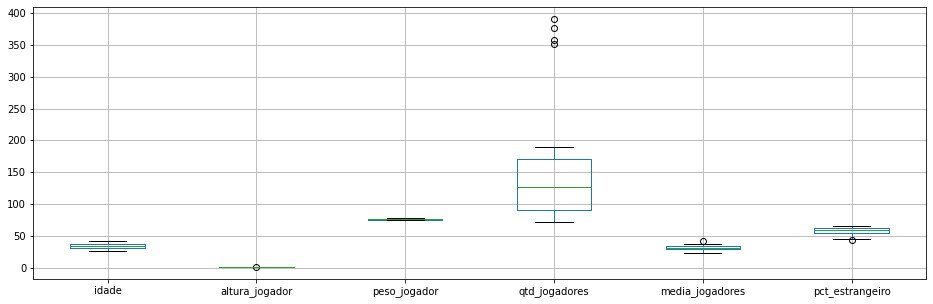

In [4]:
media_classificacao_time.drop(columns=['classificacao_time_2','ano']).boxplot(figsize=(16,5))

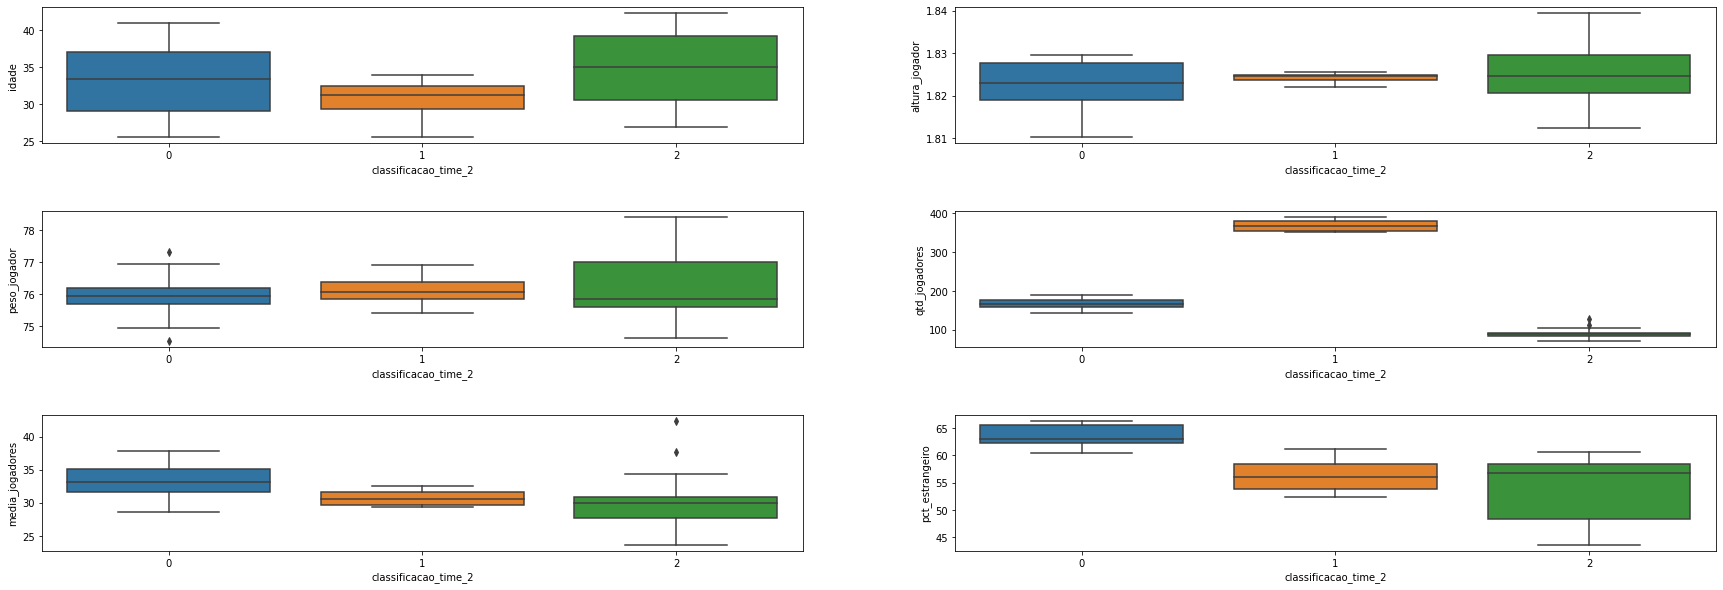

In [5]:
fig = plt.figure(figsize = (30,10))
fig.subplots_adjust(hspace=.5, wspace=0.2)

i = 1
for j,c in enumerate(media_classificacao_time.columns):
  if c not in ['classificacao_time_2','ano','time']:
    ax = fig.add_subplot(3,2,i)
    sns.boxplot(x='classificacao_time_2',y=c,data=media_classificacao_time)
    i += 1

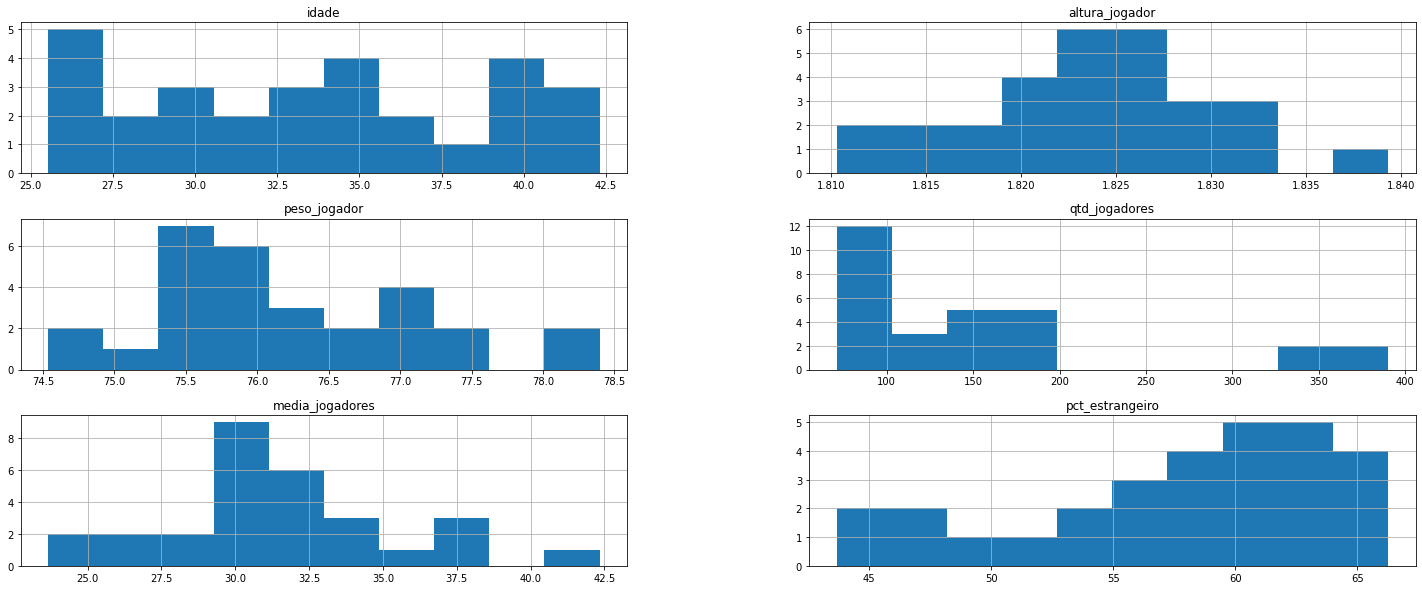

In [6]:
media_classificacao_time.drop(columns=['ano','classificacao_time_2']).hist(figsize=(25,10))
plt.show()

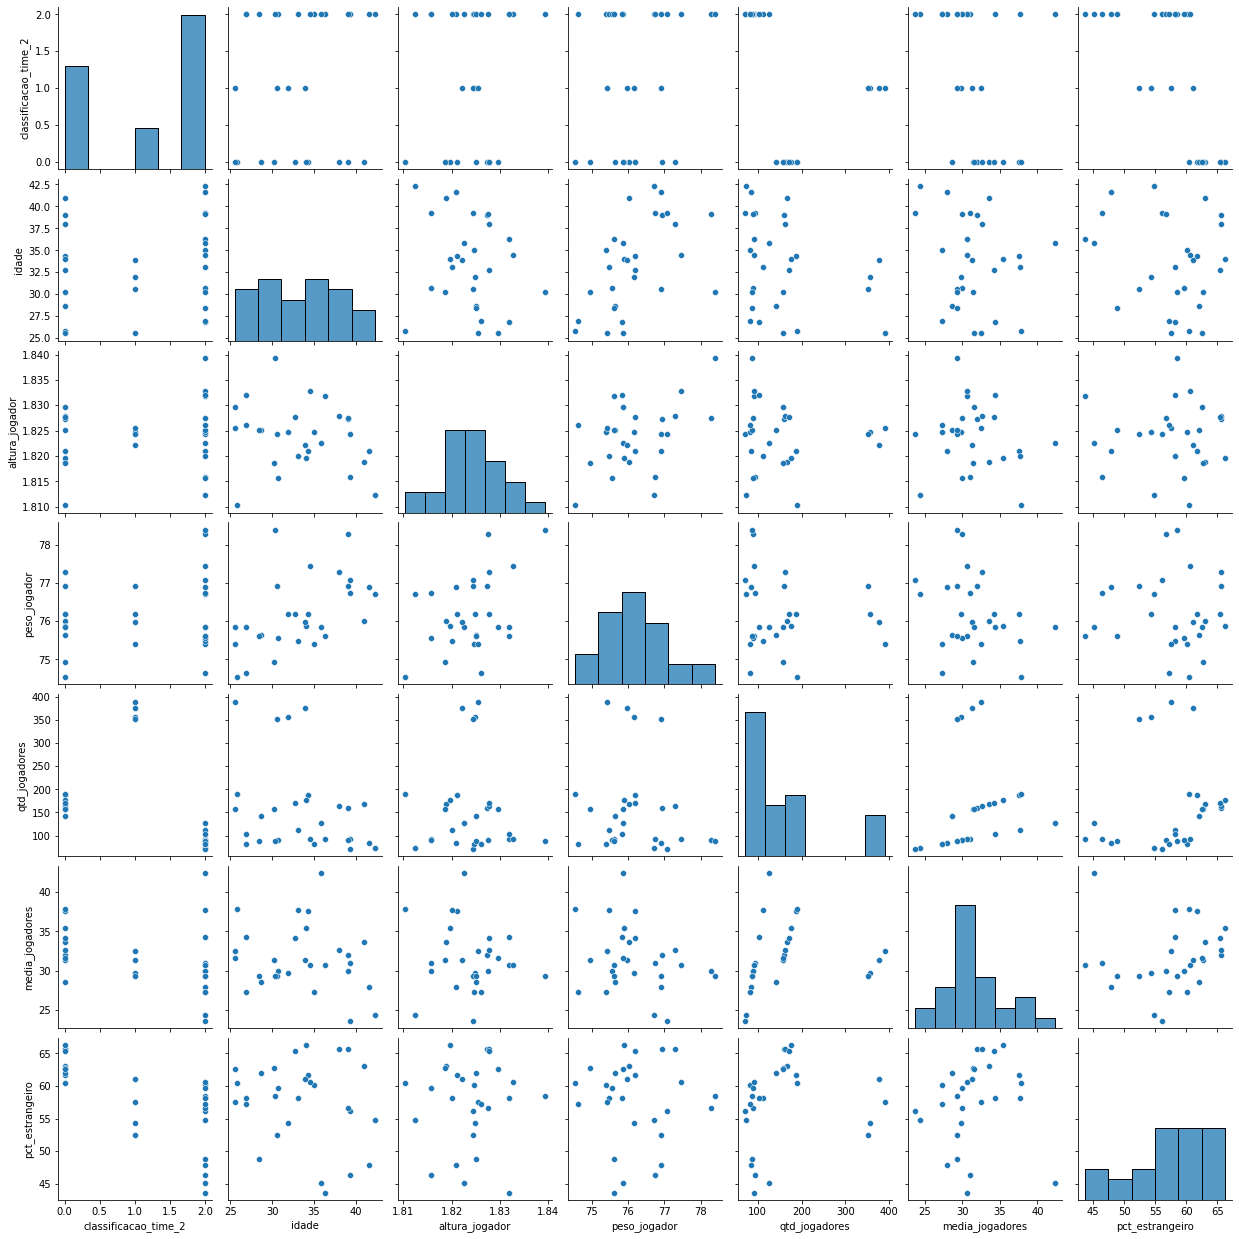

In [7]:
sns.pairplot(media_classificacao_time.drop(columns=['ano']))
plt.show()

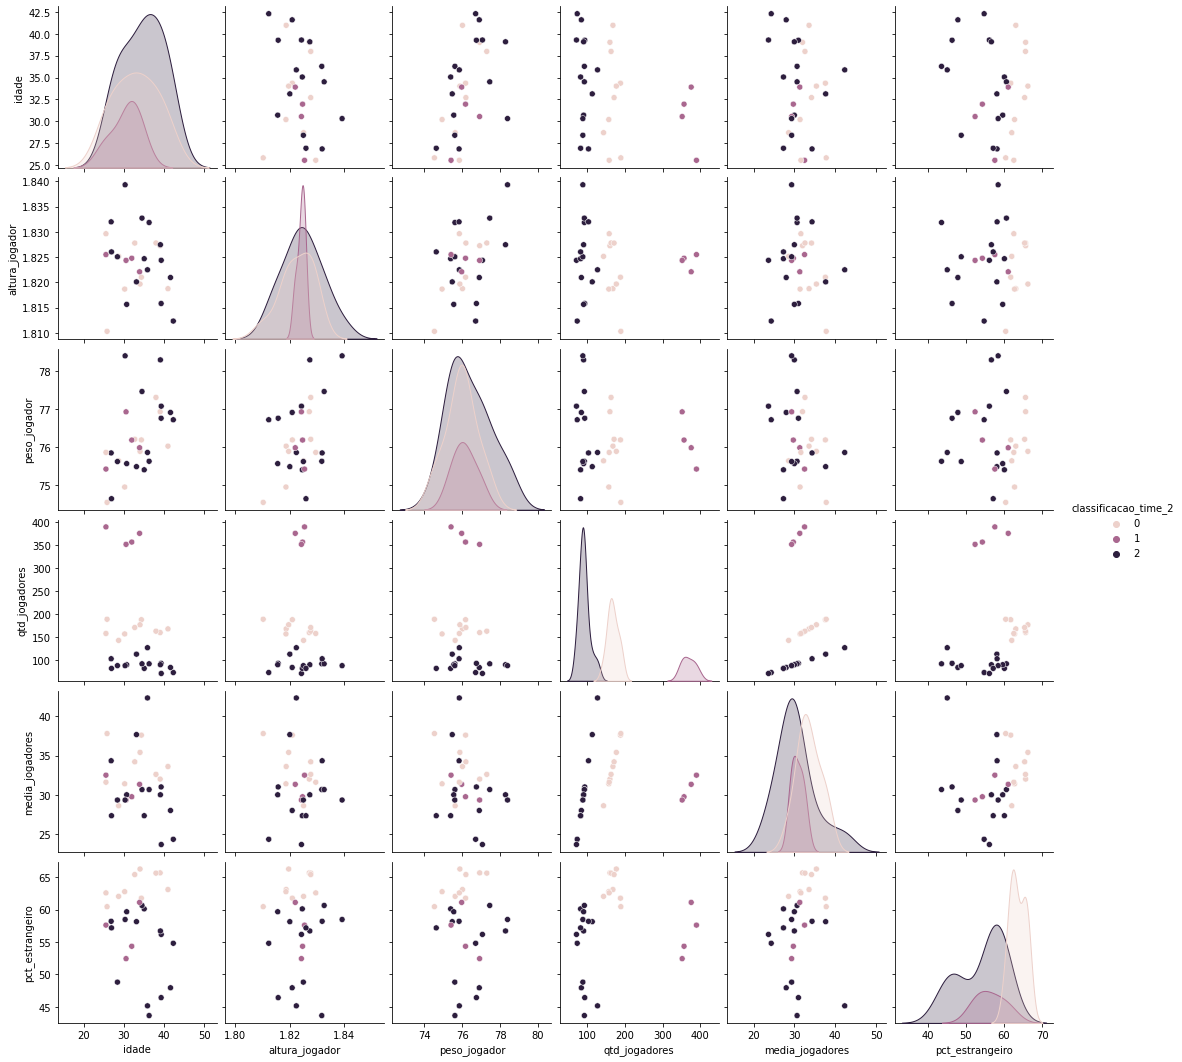

In [8]:
sns.pairplot(media_classificacao_time.drop(columns=['ano']),hue='classificacao_time_2')
plt.show()

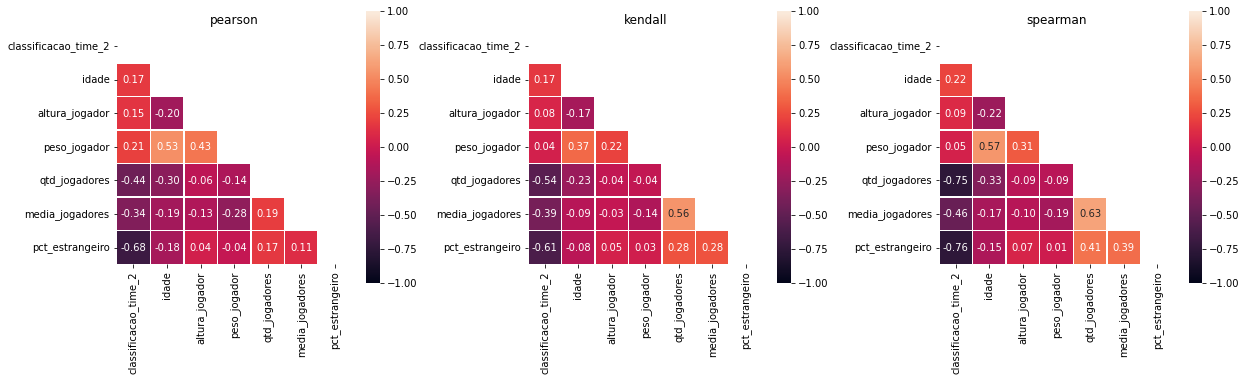

In [9]:
## Gráfico para analisar os coeficientes de correlação entre as variáveis

fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.4)

corr     = media_classificacao_time.drop(columns=['ano']).corr()
kendall  = media_classificacao_time.drop(columns=['ano']).corr('kendall')
spearman = media_classificacao_time.drop(columns=['ano']).corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[0])
sns.heatmap(kendall, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[1])
sns.heatmap(spearman, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[2])

axs[0].set_title("pearson")
axs[1].set_title("kendall")
axs[2].set_title("spearman")

plt.show()